<a href="https://colab.research.google.com/github/corinasposito/PNL_PESSOA_HETERONIMOS/blob/main/PLN_PESSOA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install nltk

In [7]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.probability import FreqDist
from nltk.chunk import ne_chunk
from nltk import WordPunctTokenizer
import string
from nltk import Text

In [8]:
nltk.download('punkt')  # Tokenización de palabras y frases
nltk.download('stopwords')  # Palabras vacías (stop words)
nltk.download('wordnet')  # Diccionario léxico WordNet
nltk.download('averaged_perceptron_tagger')  # Modelos de etiquetado gramatical
nltk.download('maxent_ne_chunker')  # Modelos para extracción de entidades con ne_chunk
nltk.download('words')  # Lista de palabras comunes

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [9]:
pip install gensim

In [10]:
#GENSIM
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import Word2Vec, Doc2Vec, TfidfModel, LdaModel
from gensim.corpora import Dictionary

In [11]:
pip install spacy

In [12]:
#SPACY
import spacy

In [13]:
pip install matplotlib wordcloud

In [14]:
import numpy as np
import json
import glob
#wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#urllib
from urllib import request


In [15]:
def leer_url(url):
    response = request.urlopen(url)
    text = response.read().decode('utf-8')
    return text

url = "https://raw.githubusercontent.com/corinaspo01/tfm1/main/campos.txt"
texto = leer_url(url)

**NLTK**

In [16]:
#TOKENIZACIÓN Y LIMPIEZA

def token_simple (texto):
    frases = sent_tokenize(texto)
    tokenizer = WordPunctTokenizer()
    tokenst = tokenizer.tokenize(texto)
    return tokenst
def limpiar_palabras(tokens):
    # Eliminar signos de puntuación y convertir a minúsculas
    tokens_limpio = [token.lower() for token in tokens if token not in string.punctuation]
    return tokens_limpio

# Tokenizar el texto
tokenizertext = token_simple(texto)

# Limpiar los tokens y excluir palabras no deseadas
tokenss = limpiar_palabras(tokenizertext)

# print(tokenss)

['de', 'y', 'que', 'la', 'en', 'el', '¡', 'a', 'los', 'no', 'las', '...', 'mi', 'es', 'por', 'un', 'del', 'me', 'con', 'lo', 'todo', 'yo', 'se', 'como', 'al', '¿', 'qué', 'vida', 'una', 'ser', 'más', 'ya', 'pero', 'o', 'todos', 'sin', 'mí', 'para', 'sí', 'si', 'sólo', 'ni', 'alma', 'tan', 'siempre', 'todas', 'cosas', 'nada', 'oh', 'mis']


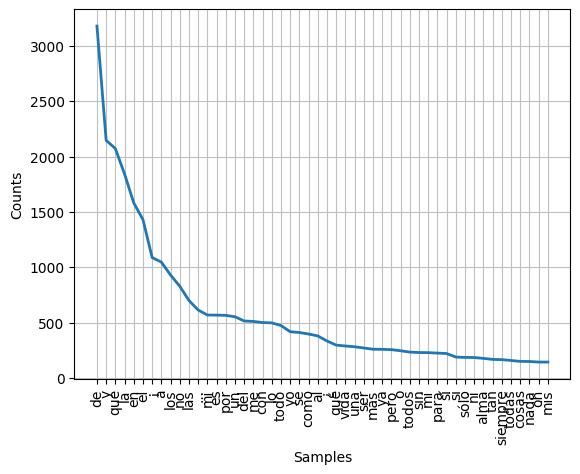

In [17]:
#PALABRAS MÁS USADAS

from nltk import FreqDist
def frecuencia_palabras(tokenss):
    frecuencias = FreqDist(tokenss)
    common = frecuencias.most_common(50)

    # Obtener solo las palabras más comunes en una lista
    palabras_comunes = [palabra for palabra, frecuencia in common]

    # Imprimir la lista de palabras más comunes
    # print("Palabras más comunes:")
    print(palabras_comunes)

    # Imprimir el gráfico de frecuencia
    frecuencias.plot(50, cumulative=False)

frecuencia_palabras(tokenss)

In [18]:
#LIMPIEZA DE TOKENS (PALABRAS)
excluir = ["el", "como", "cuando", "más", "tan", "mas", "eso", "le", "qué", "sólo", "porque", "i", "del", "se", "es", "al", "me", "son", "»", "«", "te", "el", "si", "que", "ya", "lo", "ti", "no", "ni", "sí", "la", "los", "las", "un", "una", "unos", "unas", "y", "o", "pero", "por", "para", "con", "sin", "de", "a", "en", "si", "mi", "mis", "tu", "tus", "su", "sus", "¡", "...", "-,", "¿"]

def punc_pal(texto):
    tokenizer = WordPunctTokenizer()
    tokens = tokenizer.tokenize(texto)
    return tokens

def limpiar_palabras(tokens):
    # Eliminar signos de puntuación y convertir a minúsculas
    tokens_limpio = [token.lower() for token in tokens if token not in string.punctuation]
    # Filtrar palabras no deseadas
    tokens_filtrados = [token for token in tokens_limpio if token not in excluir]
    return tokens_filtrados

# Tokenizar el texto
punctokens = punc_pal(texto)

# Limpiar los tokens y excluir palabras no deseadas
tokens_limpios = limpiar_palabras(punctokens)

# print(tokens_limpios)

**WORDCLOUD**


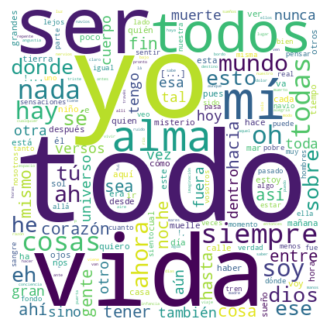

In [19]:
# Convertir la lista de palabras en un diccionario de frecuencias
frecuencias = {}
for palabra in tokens_limpios:
    if palabra in frecuencias:
        frecuencias[palabra] += 1
    else:
        frecuencias[palabra] = 1

# Crear un objeto WordCloud
nube_palabras = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(frecuencias)

# figura y el eje
plt.figure(figsize=(4, 5))
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis('off')  # Eliminar los ejes

# Mostrar la nube de palabras
plt.show()


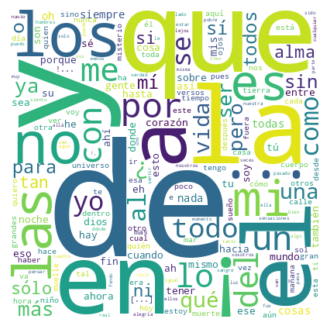

In [20]:
# Convertir la lista de palabras en un diccionario de frecuencias
frecuencias = {}
for palabra in tokenss:
    if palabra in frecuencias:
        frecuencias[palabra] += 1
    else:
        frecuencias[palabra] = 1

# Crear un objeto WordCloud
nube_palabras = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(frecuencias)

# figura y el eje
plt.figure(figsize=(4, 5))
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis('off')  # Eliminar los ejes

# Mostrar la nube de palabras
plt.show()

**RIQUEZA LEXICA NLTK**

In [21]:
# RIQUEZA LÉXICA

def riqueza_lexica(tokenss):
    Ntokens = len(tokenss)
    Ntipos = len(set(tokenss))
    rique = Ntipos / Ntokens
    return rique

respuesta_riqueza_lexica = riqueza_lexica(tokenss)
print(respuesta_riqueza_lexica)

0.14194200944032367


In [22]:
# RIQUEZA LÉXICA 2

def riqueza_lexica(tokens_limpios):
    Ntokens = len(tokens_limpios)
    Ntipos = len(set(tokens_limpios))
    rique = Ntipos / Ntokens
    return rique

respuesta_riqueza_lexica = riqueza_lexica(tokens_limpios)
print(respuesta_riqueza_lexica)

0.25186353211009177


**FORMACIONES SINTAGMÁTICAS**

In [23]:
#CATEGORÍA GRAMATICAL MÁS COMÚN

def obtener_categorias_mas_utilizadas(tokenss, top_n=10):
    pos_tags = nltk.pos_tag(tokenss)
    tags_only = [tag for _, tag in pos_tags]
    frecuencias = nltk.FreqDist(tags_only)
    common_tags = frecuencias.most_common(top_n)
    return common_tags

categorias_mas_utilizadas = obtener_categorias_mas_utilizadas(tokenss)

print("Categorías gramaticales más utilizadas:")
for tag, count in categorias_mas_utilizadas:
    print(f"{tag}: {count}")

Categorías gramaticales más utilizadas:
NN: 27884
FW: 13306
JJ: 6582
IN: 3020
NNS: 2244
VBP: 2161
DT: 1880
NNP: 1455
VBZ: 1376
PRP: 635


In [24]:
#TOKENIZAR FRASES

def tokenizar_frases(texto):
    tokens = sent_tokenize(texto)
    return tokens
sent_token = tokenizar_frases(texto)
# print (sent_token)

In [25]:
#FORMACIONES SINTACTICAS EN CATEGORÍA GRAMATICAL

def obtener_formaciones_sintacticas_mas_frecuentes(sent_token, top_n=10):
    formaciones_sintacticas = []
    for sentence in sent_token:
        word_tokens = limpiar_palabras(punc_pal(sentence))
        pos_tags = nltk.pos_tag(word_tokens)
        formations = ' '.join(tag for _, tag in pos_tags[:3])
        formaciones_sintacticas.append(formations)

    frecuencias = nltk.FreqDist(formaciones_sintacticas)
    common_formaciones = frecuencias.most_common(top_n)
    return common_formaciones

sent_token = tokenizar_frases(texto)
formaciones_sintacticas_mas_frecuentes = obtener_formaciones_sintacticas_mas_frecuentes(sent_token)

print("Formaciones sintácticas expresadas en categorías gramaticales más frecuentes:")
for formation, count in formaciones_sintacticas_mas_frecuentes:
    print(f"{formation}: {count}")

Formaciones sintácticas expresadas en categorías gramaticales más frecuentes:
NN NN NN: 1101
JJ NN NN: 197
NN NNS VBP: 143
NN: 137
NNS VBP JJ: 136
NN NN: 113
NN NN JJ: 82
NN NN NNS: 58
NN JJ NN: 42
NNS VBP NN: 38


In [26]:
#TEMPORAL

#oraciones más largas que contienen sustantivos (NN) en una secuencia
def identificar_oraciones_con_formacion(sent_token):
    oraciones_con_formacion = []
    for sentence in sent_token:
        word_tokens = limpiar_palabras(punc_pal(sentence))
        pos_tags = nltk.pos_tag(word_tokens)
        formaciones = [tag for _, tag in pos_tags]
        if len(formaciones) >= 3:
            for i in range(len(formaciones) - 2):
                if formaciones[i] == 'NN' and formaciones[i + 1] == 'NN' and formaciones[i + 2] == 'NN':
                    oraciones_con_formacion.append(sentence)
                    break

    return oraciones_con_formacion

sent_token = tokenizar_frases(texto)
oraciones_con_formacion = identificar_oraciones_con_formacion(sent_token)

# Obtener las oraciones más comunes que contienen la formación "NN NN NN"
def obtener_oraciones_mas_comunes(oraciones, top_n=10):
    frecuencias = nltk.FreqDist(oraciones)
    oraciones_comunes = frecuencias.most_common(top_n)
    return oraciones_comunes

oraciones_mas_comunes = obtener_oraciones_mas_comunes(oraciones_con_formacion)

print("Oraciones más comunes con la formación 'NN NN NN':")
for oracion, count in oraciones_mas_comunes:
    print(f"{oracion}: {count}")

Oraciones más comunes con la formación 'NN NN NN':
El día dio en lluvioso.: 4
¡Eh-eh-eh-eh-eh!: 3
¡E h-eh-eh-eh-eh-eh-eh-eh-eh-eh!: 2
Estoy cansado de la inteligencia.: 2
¡Tan poco heráldica la vida!: 1
¡Tan sentirse desnuda, tan hueca de sí misma!: 1
Vosotros ocultáis el real y entero silencio de la Hora.: 1
Desnudáis de rumores al misterio
que casi grita en mí, que casi llora,
que duerme en vuestro férreo balanceo.: 1
Llenad con lo banal y material mi oído que es vuestro.: 1
Tengo solo eso que...; y solo quiero lo que tener no puedo.: 1


**NLTK**

In [27]:
textoS = Text(tokenss)
#palabras que tienden a aparecer juntas con una frecuencia inusualmente alta
textoS.collocations()

todos los; todas las; las cosas; tal vez; todo esto; diez contos; del
mundo; sin duda; más allá; mis nervios; tan sólo; otra vez; los otros;
los ojos; tal como; cualquier cosa; igual que; por qué; todo eso;
quién sabe


In [28]:
textoL = Text(tokens_limpios)
#palabras que tienden a aparecer juntas con una frecuencia inusualmente alta
textoL.collocations()

tal vez; diez contos; todo esto; otra vez; pum pum; quién sabe;
cualquier cosa; dlôn dlôn; todo cuanto; tantas veces; cabalgada
cabalgada; pasado mañana; dio lluvioso; otra cosa; heia heia; cada
vez; hubiera sido; otro lado; arco triunfo; eia eia


In [29]:
textoS.concordance('yo')

Displaying 25 of 417 matches:
hora cuanto he sido de sueños el otro yo que tuve resbala por mi alma ... en u
e se va de mi propia conciencia aquel yo que no obtuve ahí en mi interior de m
tedio de ser esto aquí y allí otro no yo ... sigamos ... ¡ otras tierras viví 
qué quiero ser ¿ qué deseo querer que yo cierre los ojos y el tren sea solamen
ensación soy algo ateo y no sé si soy yo quien en mí siente ii la praça da fig
lo amo incluso aquí ... pero ¿ qué sé yo por qué no importa nada adelante ... 
ia a esa extraña cecily que creyó que yo había de ser grande ... ¡ lleve el di
sentir la vida cansa y desfallece mas yo busco en el opio que consuela un orie
lidad no tengo alguna más notorio que yo hasta el criado de a bordo con su est
de metida sobre la línea mística cual yo y ¿ cuántos bajo capa a nuestra vida 
o capa a nuestra vida no tendrán como yo el mismo horror ¡ si al menos yo por 
como yo el mismo horror ¡ si al menos yo por fuera me igualara en interés a co
mi hasta que al fin me

In [30]:
textoL.similar('yo')

mí sea absurdo vida todo fin siempre ahora hoy ser donde mendigo soy
casa perdí menos dios fumar pura pasa


In [31]:
textoL.common_contexts(['yo'])
textoL.common_contexts(['existir'])

ser_siempre galopada_galopada mundo_soy nada_he niño_he todo_anhelo
margarida_diera otro_tuve aquel_obtuve otro_sigamos querer_cierre
soy_quien sé_importa creyó_había desfallece_busco notorio_hasta
cual_cuántos tendrán_mismo menos_fuera cajón_nací
modo_nunca ausencia_aquello puede_luego existencia_ser
razón_socialmente esperar_ser abismo_abismo hay_crearlo todo_siempre
inconsciente_sea aún_destruidas fondo_está ah_fenómeno abstracto_haya
humillación_amor resultado_verdaderamente voy_arre voy_e novelas_freud
tengo_haciendo


Displaying 1 of 1 matches:
aceite el calor los carbones de esta flora estupenda negra artificial siempre i
None
Displaying 7 of 7 matches:
a a esos a los sanos lo absurdo como flor de aquel confín de la india que en l
o en mí el espasmo traslúcido de ser flor de acción de los otros fiesta de que
sea una piedra o un ansia ya sea una flor o una idea abstracta sea una multitu
encia la imaginación la inhibición a flor de piel para poder irme rodando por 
e que cada momento nunca pasa que la flor que es cogida sigue siempre en el ta
espíritu humano de la tierra materna flor sobrenadando del diluvio de la intel
bebé rubito que va flotando muerto a flor de agua yo en cuyo corazón es rabia 
None
Displaying 1 of 1 matches:
 las violaciones y los sonidos que florecen en los gritos tan misteriosamente 
None
Displaying 1 of 1 matches:
a siempre hasta lo eterno en alegre aflora hasta lo ... gran libertador que qu
None
Displaying 1 of 1 matches:
l cambio en celo de vegetación y florescencia rompiend

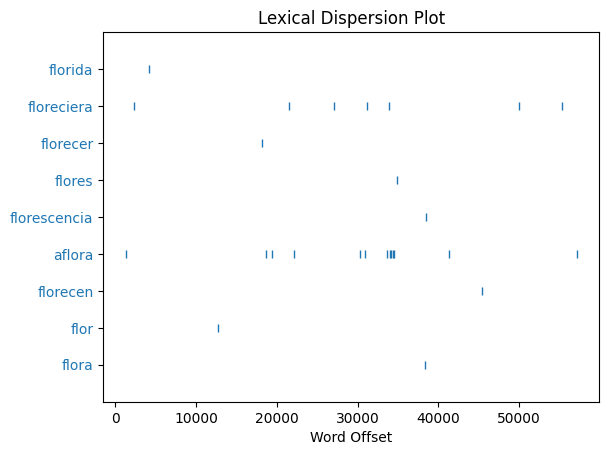

In [32]:
der_flor = set([tok for tok in tokenss if 'flor' in tok])

for der in der_flor:
    print(textoS.concordance(der))

textoS.dispersion_plot(list(der_flor))